In [21]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os


In [48]:
cwr = os.getcwd().strip('/notebooks')
index = pd.read_csv(f'/{cwr}/raw_data/index.csv')
metadata = pd.read_csv(f'/{cwr}/raw_data/metadata.csv',index_col='class_id')
test = pd.read_csv(f'/{cwr}/raw_data/test.csv')
metadata.head()


,lego_ids,lego_names,minifigure_name
class_id,,,
1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
2,[76115],['Spider Mech vs. Venom'],VENOM
3,[76115],['Spider Mech vs. Venom'],AUNT MAY
4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
5,[75208],"[""Yoda's Hut""]",YODA


In [23]:
test.head()


,path,class_id
0,test/001.jpg,32
1,test/002.jpg,32
2,test/003.jpg,32
3,test/004.jpg,32
4,test/005.jpg,1


In [49]:
images = []
tests = []
for path in index['path']:
    image = np.asarray(Image.open(f'/{cwr}/raw_data/{path}')\
        .resize((224, 224))
        )
    images.append(image)
for path in test['path']:
    image = np.asarray(Image.open(f'/{cwr}/raw_data/{path}')\
        .resize((224, 224))

        )
    tests.append(image)
images = np.stack(images,axis=0)
tests = np.stack(tests,axis=0)
images.shape, tests.shape


((371, 224, 224, 3), (79, 224, 224, 3))

In [50]:
X_train = images
X_test = tests
y_train = np.array(index['class_id'])-1
y_test = np.array(test['class_id'])-1


In [26]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [56]:
def load_own_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(224,224,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(38, activation='softmax'))

    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model


In [57]:
model_homemade = load_own_model()
model_homemade.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 215, 215, 16)      4816      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 71, 71, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 66, 66, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 15488)            

In [54]:
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
y_train


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 23, 23

In [61]:

es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history = model_homemade.fit(X_train, y_train,
                             validation_data=(X_test, y_test),
                             batch_size = 16,
                             epochs = 100,
                             callbacks=[es])


Epoch 1/100
24/24 [==============================] - 22s 937ms/step - loss: 0.0798 - accuracy: 0.9946 - val_loss: 3.8212 - val_accuracy: 0.2911
Epoch 2/100
24/24 [==============================] - 28s 1s/step - loss: 0.0660 - accuracy: 1.0000 - val_loss: 3.9472 - val_accuracy: 0.3038
Epoch 3/100
24/24 [==============================] - 33s 1s/step - loss: 0.0579 - accuracy: 1.0000 - val_loss: 3.8367 - val_accuracy: 0.3165
Epoch 4/100
24/24 [==============================] - 32s 1s/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 3.9455 - val_accuracy: 0.3038
Epoch 5/100
24/24 [==============================] - 31s 1s/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 4.0264 - val_accuracy: 0.3165
Epoch 6/100
24/24 [==============================] - 31s 1s/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 3.9811 - val_accuracy: 0.3291
Epoch 7/100
24/24 [==============================] - 36s 1s/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 3.9401 - val_accuracy: 0.3418
Epoch 8/10

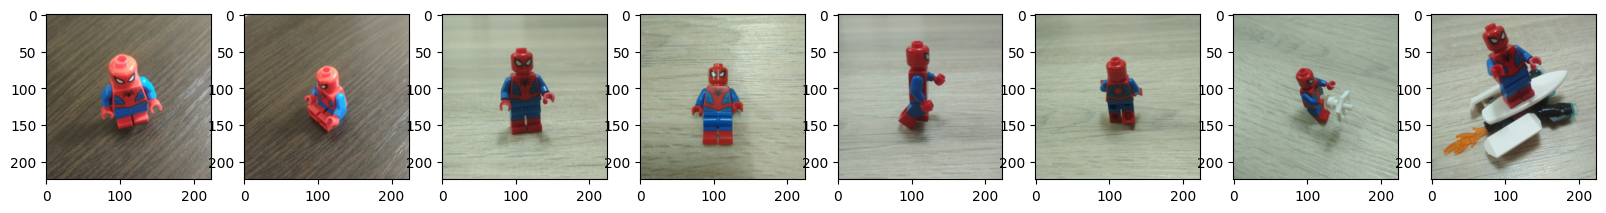

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])


In [62]:
res = model_homemade.evaluate(X_test, y_test)
res


3/3 [==============================] - 1s 225ms/step - loss: 4.1339 - accuracy: 0.3544


[4.133857250213623, 0.3544303774833679]

In [63]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")


test_accuracy = 35.0 %
